In [5]:
import pandas as pd
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [3]:
df = pd.read_csv("feature engineering/result3.csv")

In [7]:
X = df[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED','PRCP', 'TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = df['COUNT_BINS'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)

In [8]:
clf = RandomForestClassifier(n_estimators=125, max_depth=5, random_state=0)
clf = clf.fit(X_train, y_train)  
clf.score(X_test, y_test)

KeyboardInterrupt: 

In [9]:
decisionTree = tree.DecisionTreeClassifier(min_impurity_decrease=0)
decisionTree.fit(X_train, y_train)
decisionTree.score(X_test, y_test)

0.7360914712048435

In [ ]:
model1 = xgb.XGBClassifier()
train_model1 = model1.fit(X_train, y_train)
train_model1.score(X_test, y_test)

In [11]:
depth = []
for i in range(3,10):
    print(i)
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))

3
4
5
6
7
8


/home/rebecca/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


9


In [12]:
depth

[(3, 0.78458195598877),
 (4, 0.78458195598877),
 (5, 0.7789567266051621),
 (6, 0.7839797487300059),
 (7, 0.7872307910085727),
 (8, 0.7923561602903246),
 (9, 0.7908998144592126)]

In [13]:
for i in range(10,20):
    print(i)
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))

10
11
12
13
14
15
16
17
18
19


In [14]:
depth

[(3, 0.78458195598877),
 (4, 0.78458195598877),
 (5, 0.7789567266051621),
 (6, 0.7839797487300059),
 (7, 0.7872307910085727),
 (8, 0.7923561602903246),
 (9, 0.7908998144592126),
 (10, 0.7944994449197361),
 (11, 0.7952171023501405),
 (12, 0.7967553305562954),
 (13, 0.7960359782593649),
 (14, 0.7930300262980136),
 (15, 0.7917317706924416),
 (16, 0.7861037165011082),
 (17, 0.780575176396671),
 (18, 0.7740998147191419),
 (19, 0.7656244664291647)]

depth and cross validation accuracy
[(3, 0.78458195598877),
 (4, 0.78458195598877),
 (5, 0.7789567266051621),
 (6, 0.7839797487300059),
 (7, 0.7872307910085727),
 (8, 0.7923561602903246),
 (9, 0.7908998144592126),
 (10, 0.7944994449197361),
 (11, 0.7952171023501405),
 (12, 0.7967553305562954),
 (13, 0.7960359782593649),
 (14, 0.7930300262980136),
 (15, 0.7917317706924416),
 (16, 0.7861037165011082),
 (17, 0.780575176396671),
 (18, 0.7740998147191419),
 (19, 0.7656244664291647)]

In [15]:
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini')
dt = decisionTree.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7962123308703943

In [16]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.82      0.96      0.88    414069
         10+       0.53      0.02      0.03      4663
         3-9       0.53      0.21      0.30    108822

    accuracy                           0.80    527554
   macro avg       0.63      0.39      0.40    527554
weighted avg       0.76      0.80      0.76    527554



In [17]:
df.COUNT_BINS.value_counts()

0-2    1379696
3-9     363317
10+      15498
Name: COUNT_BINS, dtype: int64

In [20]:
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': 1, '3-9': 10, '10+':100})
dt_weighted = decisionTree.fit(X_train, y_train)
dt_weighted.score(X_test, y_test)



0.45568605299173165

In [21]:
y_pred = dt_weighted.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.96      0.36      0.52    414069
         10+       0.10      0.57      0.18      4663
         3-9       0.26      0.82      0.39    108822

    accuracy                           0.46    527554
   macro avg       0.44      0.58      0.36    527554
weighted avg       0.81      0.46      0.49    527554



In [22]:
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .1, '3-9': 1, '10+':10})
dt_weighted2 = decisionTree.fit(X_train, y_train)
dt_weighted.score(X_test, y_test)



0.4555287231259738

In [23]:
y_pred = dt_weighted2.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.96      0.36      0.52    414069
         10+       0.10      0.57      0.18      4663
         3-9       0.26      0.82      0.39    108822

    accuracy                           0.46    527554
   macro avg       0.44      0.58      0.36    527554
weighted avg       0.81      0.46      0.49    527554



In [28]:
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': 1, '3-9': 3.8, '10+':89})
dt_weighted3 = decisionTree.fit(X_train, y_train)
dt_weighted3.score(X_test, y_test)


0.6121515522581574

In [30]:
y_pred = dt_weighted3.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.91      0.64      0.75    414069
         10+       0.06      0.78      0.11      4663
         3-9       0.31      0.50      0.38    108822

    accuracy                           0.61    527554
   macro avg       0.43      0.64      0.42    527554
weighted avg       0.78      0.61      0.67    527554



In [ ]:
#we want to optimize for recall in the minority classes
precision: What proportion of positive identifications was actually correct?
recall: What proportion of actual positives was identified correctly?

In [37]:
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': 1, '3-9': 3.9, '10+':85})
dt_weighted4 = decisionTree.fit(X_train, y_train)
dt_weighted4.score(X_test, y_test)


0.6102408473824481

In [34]:
y_pred = dt_weighted4.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.91      0.62      0.74    414069
         10+       0.06      0.77      0.12      4663
         3-9       0.30      0.53      0.39    108822

    accuracy                           0.60    527554
   macro avg       0.43      0.64      0.41    527554
weighted avg       0.78      0.60      0.66    527554



In [144]:
decisionTree = tree.DecisionTreeClassifier(max_depth=11, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)
y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))


              precision    recall  f1-score   support

         0-2       0.93      0.54      0.68    413850
         10+       0.08      0.69      0.15      4731
         3-9       0.29      0.66      0.40    108966

    accuracy                           0.57    527547
   macro avg       0.43      0.63      0.41    527547
weighted avg       0.79      0.57      0.62    527547



In [162]:
#this one!
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

import pickle
filename = 'dt5gini_.19_1_14.pkl'
pickle.dump(dt_weighted5, open(filename, 'wb'))

              precision    recall  f1-score   support

         0-2       0.93      0.53      0.67    413586
         10+       0.08      0.69      0.14      4627
         3-9       0.29      0.67      0.41    109339

    accuracy                           0.56    527552
   macro avg       0.43      0.63      0.41    527552
weighted avg       0.79      0.56      0.61    527552



In [45]:
y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.92      0.56      0.70    414069
         10+       0.10      0.64      0.18      4663
         3-9       0.30      0.69      0.42    108822

    accuracy                           0.59    527554
   macro avg       0.44      0.63      0.43    527554
weighted avg       0.79      0.59      0.64    527554



In [54]:
X = df[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED', 'TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = df['COUNT_BINS'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)

In [55]:
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)


0.5714334456757033

In [56]:
y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.93      0.54      0.68    414216
         10+       0.09      0.67      0.16      4593
         3-9       0.30      0.69      0.41    108745

    accuracy                           0.57    527554
   macro avg       0.44      0.63      0.42    527554
weighted avg       0.79      0.57      0.62    527554



In [57]:
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='entropy', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5E = decisionTree.fit(X_train, y_train)
dt_weighted5E.score(X_test, y_test)



0.5779730605776849

In [58]:
y_pred = dt_weighted5E.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.92      0.56      0.70    414216
         10+       0.08      0.69      0.14      4593
         3-9       0.30      0.65      0.41    108745

    accuracy                           0.58    527554
   macro avg       0.43      0.63      0.42    527554
weighted avg       0.79      0.58      0.63    527554



In [59]:
depthE = []
for i in range(3,20):
    print(i)
    clf = tree.DecisionTreeClassifier(max_depth=i, criterion='entropy', class_weight={'0-2': .19, '3-9': 1, '10+':14})
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depthE.append((i,scores.mean()))

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


/home/rebecca/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


19


In [67]:
for i in range(50,55):
    print(i)
    clf = tree.DecisionTreeClassifier(max_depth=i, criterion='entropy', class_weight={'0-2': .19, '3-9': 1, '10+':14})
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depthE.append((i,scores.mean()))

50
51
52
53
54


In [68]:
depthE

[(3, 0.45268317541881664),
 (4, 0.45723625418168856),
 (5, 0.45478137251502504),
 (6, 0.46821544158375566),
 (7, 0.5121452705562455),
 (8, 0.5134230371499493),
 (9, 0.5390470339912886),
 (10, 0.5631208079034864),
 (11, 0.5913679746251604),
 (12, 0.5945462342077219),
 (13, 0.6053627762749761),
 (14, 0.6055612637308085),
 (15, 0.6105529735047192),
 (16, 0.6080605093151269),
 (17, 0.6116465009007291),
 (18, 0.6138432438072788),
 (19, 0.6171733288761211),
 (20, 0.6206052089932743),
 (21, 0.624072917654134),
 (22, 0.6295172933355662),
 (23, 0.6340228048132156),
 (24, 0.6391089222710632),
 (25, 0.6452379697288755),
 (26, 0.651082688106771),
 (27, 0.656970053098595),
 (28, 0.6629029110936173),
 (29, 0.6679833451353406),
 (30, 0.6727385043348095),
 (31, 0.6772457257548278),
 (32, 0.6807970241661315),
 (33, 0.6841788619430959),
 (34, 0.6867617307344581),
 (35, 0.6886565141214037),
 (36, 0.6904205076192517),
 (37, 0.6914406871902017),
 (38, 0.692670706009608),
 (39, 0.69348048109892),
 (40, 0.69

In [75]:
decisionTree = tree.DecisionTreeClassifier(max_depth=40, criterion='entropy', class_weight={'0-2': .08, '3-9': 1.2, '10+':20})
dt_weighted6E = decisionTree.fit(X_train, y_train)
dt_weighted6E.score(X_test, y_test)


0.7274364330476122

In [76]:
y_pred = dt_weighted6E.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.84      0.82      0.83    414216
         10+       0.20      0.21      0.21      4593
         3-9       0.37      0.40      0.38    108745

    accuracy                           0.73    527554
   macro avg       0.47      0.48      0.47    527554
weighted avg       0.74      0.73      0.73    527554



In [77]:
decisionTree = tree.DecisionTreeClassifier(max_depth=40, criterion='gini', class_weight={'0-2': .08, '3-9': 1.2, '10+':20})
dt_weighted6 = decisionTree.fit(X_train, y_train)
dt_weighted6.score(X_test, y_test)


0.7184496752939036

In [78]:
y_pred = dt_weighted6.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.85      0.79      0.82    414216
         10+       0.20      0.24      0.22      4593
         3-9       0.36      0.45      0.40    108745

    accuracy                           0.72    527554
   macro avg       0.47      0.49      0.48    527554
weighted avg       0.74      0.72      0.73    527554



In [79]:
decisionTree = tree.DecisionTreeClassifier(max_depth=30, criterion='gini', class_weight={'0-2': .08, '3-9': 1.2, '10+':20})
dt_weighted7 = decisionTree.fit(X_train, y_train)
dt_weighted7.score(X_test, y_test)


0.6547216019592307

In [80]:
y_pred = dt_weighted7.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.87      0.67      0.76    414216
         10+       0.17      0.34      0.23      4593
         3-9       0.32      0.59      0.42    108745

    accuracy                           0.65    527554
   macro avg       0.46      0.54      0.47    527554
weighted avg       0.75      0.65      0.69    527554



In [104]:
deletedf = df.loc[(df['COUNT'] > 40)]

In [105]:
deletedf

,Unnamed: 0,Datetime,start_station_id,AVG_WND_SPEED,Bike Score,COUNT,FOG,HOLIDAY,Neighborhood,PRCP,...,TMAX,TMIN,Transit Score,WEEKDAY,Walk Score,hour_of_day,month,start_lat,start_lon,COUNT_BINS
1565,1565,2015-04-26 11:00:00,3059.0,7.38,97.0,46.0,0.0,False,Northern Liberties – Fishtown,0.00,...,64,45,86.0,0,96.0,11,4,39.962650,-75.161740,10+
3354,3354,2015-04-29 10:00:00,3037.0,8.05,78.0,48.0,0.0,False,Center City East,0.00,...,77,51,100.0,1,99.0,10,4,39.954240,-75.161380,10+
5464,5464,2015-05-02 08:00:00,3061.0,4.70,98.0,49.0,0.0,False,Center City West,0.00,...,74,47,100.0,0,91.0,8,5,39.954250,-75.177610,10+
5558,5558,2015-05-02 11:00:00,3020.0,4.70,88.0,42.0,0.0,False,University City,0.00,...,74,47,98.0,0,75.0,11,5,39.948870,-75.189860,10+
5840,5840,2015-05-02 16:00:00,3051.0,4.70,94.0,41.0,0.0,False,Fairmount – Art Museum,0.00,...,74,47,73.0,0,93.0,16,5,39.967440,-75.175070,10+
5972,5972,2015-05-02 19:00:00,3031.0,4.70,74.0,46.0,0.0,False,Avenue of the Arts North,0.00,...,74,47,89.0,0,83.0,19,5,39.980050,-75.155220,10+
5989,5989,2015-05-02 19:00:00,3056.0,4.70,79.0,49.0,0.0,False,Avenue of the Arts North,0.00,...,74,47,88.0,0,81.0,19,5,39.976690,-75.158130,10+
9978,9978,2015-05-07 20:00:00,3014.0,5.37,94.0,50.0,0.0,False,Logan Square,0.00,...,81,57,100.0,1,95.0,20,5,39.958860,-75.173690,10+
131680,131680,2015-09-26 13:00:00,3023.0,12.30,90.0,41.0,0.0,False,Rittenhouse Square,0.00,...,72,61,100.0,0,99.0,13,9,39.950480,-75.172860,10+
131736,131736,2015-09-26 14:00:00,3023.0,12.30,90.0,57.0,0.0,False,Rittenhouse Square,0.00,...,72,61,100.0,0,99.0,14,9,39.950480,-75.172860,10+


In [106]:
result = pd.concat([df, deletedf, deletedf]).drop_duplicates(keep=False)

In [107]:
X = result[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED', 'TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = result['COUNT_BINS'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)

In [118]:
decisionTree = tree.DecisionTreeClassifier(max_depth=22, criterion='gini', class_weight={'0-2': .08, '3-9': 1.4, '10+':25})
dt_weighted7 = decisionTree.fit(X_train, y_train)
dt_weighted7.score(X_test, y_test)


0.5314351138381983

In [111]:
#20
y_pred = dt_weighted7.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.92      0.42      0.58    413948
         10+       0.11      0.56      0.19      4722
         3-9       0.26      0.76      0.39    108877

    accuracy                           0.49    527547
   macro avg       0.43      0.58      0.39    527547
weighted avg       0.78      0.49      0.54    527547



In [115]:
#24
y_pred = dt_weighted7.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.90      0.53      0.67    413948
         10+       0.14      0.46      0.22      4722
         3-9       0.29      0.71      0.41    108877

    accuracy                           0.56    527547
   macro avg       0.44      0.57      0.43    527547
weighted avg       0.77      0.56      0.61    527547



In [119]:
#22
y_pred = dt_weighted7.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.91      0.48      0.63    413948
         10+       0.12      0.53      0.20      4722
         3-9       0.27      0.73      0.40    108877

    accuracy                           0.53    527547
   macro avg       0.44      0.58      0.41    527547
weighted avg       0.77      0.53      0.58    527547



In [127]:
X = result[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED', 'PRCP','FOG','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = result['COUNT_BINS'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)

In [128]:
decisionTree = tree.DecisionTreeClassifier(max_depth=22, criterion='gini', class_weight={'0-2': .08, '3-9': 1.4, '10+':25})
dt_weighted8 = decisionTree.fit(X_train, y_train)
dt_weighted8.score(X_test, y_test)


0.5328511014184518

In [122]:
y_pred = dt_weighted8.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.91      0.48      0.63    413902
         10+       0.12      0.54      0.20      4638
         3-9       0.27      0.73      0.40    109007

    accuracy                           0.53    527547
   macro avg       0.44      0.58      0.41    527547
weighted avg       0.77      0.53      0.58    527547



In [123]:
df.columns.values

array(['Unnamed: 0', 'Datetime', 'start_station_id', 'AVG_WND_SPEED',
       'Bike Score', 'COUNT', 'FOG', 'HOLIDAY', 'Neighborhood', 'PRCP',
       'Population', 'SLEET_OR_HAIL', 'SNOW', 'SNOW_DEPTH', 'TAVG',
       'THUNDER', 'TMAX', 'TMIN', 'Transit Score', 'WEEKDAY',
       'Walk Score', 'hour_of_day', 'month', 'start_lat', 'start_lon',
       'COUNT_BINS'], dtype=object)

In [129]:
y_pred = dt_weighted8.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.91      0.48      0.63    413850
         10+       0.13      0.51      0.20      4731
         3-9       0.28      0.73      0.40    108966

    accuracy                           0.53    527547
   macro avg       0.44      0.58      0.41    527547
weighted avg       0.77      0.53      0.58    527547



In [136]:
decisionTree = tree.DecisionTreeClassifier(max_depth=16, criterion='gini', class_weight={'0-2': .08, '3-9': 1.2, '10+':23})
dt_weighted9 = decisionTree.fit(X_train, y_train)
dt_weighted9.score(X_test, y_test)

0.43281641256608416

In [131]:
y_pred = dt_weighted9.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.94      0.35      0.51    413850
         10+       0.09      0.63      0.16      4731
         3-9       0.25      0.77      0.37    108966

    accuracy                           0.44    527547
   macro avg       0.43      0.59      0.35    527547
weighted avg       0.79      0.44      0.48    527547



In [135]:
y_pred = dt_weighted9.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.96      0.29      0.45    413850
         10+       0.09      0.68      0.15      4731
         3-9       0.23      0.78      0.36    108966

    accuracy                           0.40    527547
   macro avg       0.43      0.58      0.32    527547
weighted avg       0.80      0.40      0.43    527547



In [137]:
y_pred = dt_weighted9.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.95      0.34      0.50    413850
         10+       0.09      0.66      0.16      4731
         3-9       0.24      0.77      0.37    108966

    accuracy                           0.43    527547
   macro avg       0.43      0.59      0.34    527547
weighted avg       0.79      0.43      0.47    527547



In [ ]:
#we want to optimize for recall in the minority classes
precision: What proportion of positive identifications was actually correct?
recall: What proportion of actual positives was identified correctly?

In [146]:
X = df[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED', 'TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = df['COUNT_BINS'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)

decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

import pickle
filename = 'dt5gini_.19_1_14_nocuts.pkl'
pickle.dump(clf, open(filename, 'wb'))

              precision    recall  f1-score   support

         0-2       0.93      0.54      0.68    413626
         10+       0.07      0.70      0.13      4723
         3-9       0.29      0.65      0.40    109205

    accuracy                           0.56    527554
   macro avg       0.43      0.63      0.40    527554
weighted avg       0.79      0.56      0.62    527554



In [147]:
56+69+66

191

In [148]:
54+70+65

189

In [149]:
deletedf = df.loc[(df['COUNT'] > 50)]

In [150]:
result = pd.concat([df, deletedf, deletedf]).drop_duplicates(keep=False)

In [154]:
X = result[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED', 'TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = result['COUNT_BINS'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .18, '3-9': 1.1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.94      0.48      0.64    413586
         10+       0.09      0.67      0.15      4627
         3-9       0.28      0.72      0.40    109339

    accuracy                           0.53    527552
   macro avg       0.43      0.62      0.40    527552
weighted avg       0.79      0.53      0.58    527552



In [159]:

model1 = xgb.XGBClassifier(max_depth=12, scale_pos_weight={'0-2': .18, '3-9': 1.1, '10+':14})
train_model1 = model1.fit(X_train, y_train)
train_model1.score(X_test, y_test)

0.8092074335800072

In [160]:
y_pred = train_model1.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.83      0.96      0.89    413586
         10+       0.55      0.07      0.12      4627
         3-9       0.60      0.26      0.36    109339

    accuracy                           0.81    527552
   macro avg       0.66      0.43      0.46    527552
weighted avg       0.78      0.81      0.77    527552



In [161]:
import pickle
filename = 'xgb1_.18_1.1_14_nocuts.pkl'
pickle.dump(train_model1, open(filename, 'wb'))

In [163]:
model1 = xgb.XGBClassifier(max_depth=14, scale_pos_weight={'0-2': .18, '3-9': 1.1, '10+':14})
train_model2 = model1.fit(X_train, y_train)
train_model2.score(X_test, y_test)
y_pred = train_model2.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.83      0.96      0.89    413586
         10+       0.52      0.08      0.14      4627
         3-9       0.60      0.28      0.38    109339

    accuracy                           0.81    527552
   macro avg       0.65      0.44      0.47    527552
weighted avg       0.78      0.81      0.78    527552



In [165]:
model1 = xgb.XGBClassifier(max_depth=10, scale_pos_weight={'0-2': .18, '3-9': 1.1, '10+':14})
train_model3 = model1.fit(X_train, y_train)
train_model3.score(X_test, y_test)
y_pred = train_model3.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.82      0.97      0.89    413586
         10+       0.55      0.06      0.11      4627
         3-9       0.59      0.23      0.33    109339

    accuracy                           0.81    527552
   macro avg       0.66      0.42      0.44    527552
weighted avg       0.77      0.81      0.77    527552



In [166]:
model1 = xgb.XGBClassifier(max_depth=12, scale_pos_weight={'0-2': .15, '3-9': 1.1, '10+':16})
train_model4 = model1.fit(X_train, y_train)
train_model4.score(X_test, y_test)
y_pred = train_model4.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.83      0.96      0.89    413586
         10+       0.55      0.07      0.12      4627
         3-9       0.60      0.26      0.36    109339

    accuracy                           0.81    527552
   macro avg       0.66      0.43      0.46    527552
weighted avg       0.78      0.81      0.77    527552



In [167]:
model1 = xgb.XGBClassifier(max_depth=25, scale_pos_weight={'0-2': .16, '3-9': 1.1, '10+':15})
train_model2 = model1.fit(X_train, y_train)
train_model2.score(X_test, y_test)
y_pred = train_model2.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.84      0.93      0.88    413586
         10+       0.40      0.16      0.22      4627
         3-9       0.54      0.34      0.42    109339

    accuracy                           0.80    527552
   macro avg       0.59      0.48      0.51    527552
weighted avg       0.78      0.80      0.78    527552



In [168]:
model1 = xgb.XGBClassifier(max_depth=50, scale_pos_weight={'0-2': .1, '3-9': 1.1, '10+':15})
train_model2p = model1.fit(X_train, y_train)
train_model2p.score(X_test, y_test)
y_pred = train_model2p.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.84      0.92      0.88    413586
         10+       0.37      0.15      0.22      4627
         3-9       0.52      0.35      0.42    109339

    accuracy                           0.79    527552
   macro avg       0.58      0.48      0.51    527552
weighted avg       0.77      0.79      0.78    527552



In [169]:
model1 = xgb.XGBClassifier(max_depth=25, scale_pos_weight={'0-2': .1, '3-9': 2.5, '10+':25})
train_model3p = model1.fit(X_train, y_train)
train_model3p.score(X_test, y_test)
y_pred = train_model3p.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.84      0.93      0.88    413586
         10+       0.40      0.16      0.22      4627
         3-9       0.54      0.34      0.42    109339

    accuracy                           0.80    527552
   macro avg       0.59      0.48      0.51    527552
weighted avg       0.78      0.80      0.78    527552



In [170]:
model1 = xgb.XGBClassifier(max_depth=12, scale_pos_weight={'0-2': .1, '3-9': 1.1, '10+':16})
train_model5 = model1.fit(X_train, y_train)
train_model5.score(X_test, y_test)
y_pred = train_model5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.83      0.96      0.89    413586
         10+       0.55      0.07      0.12      4627
         3-9       0.60      0.26      0.36    109339

    accuracy                           0.81    527552
   macro avg       0.66      0.43      0.46    527552
weighted avg       0.78      0.81      0.77    527552



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68292c29b0>]],
      dtype=object)

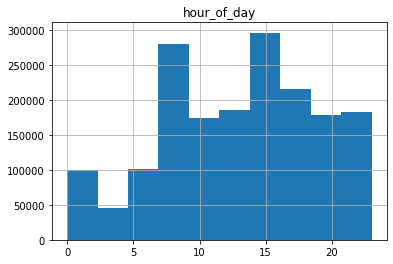

In [175]:
%matplotlib inline
result.hist(column="hour_of_day")

In [193]:
for i in range(0,6):
    print(i)
    print('0-2: ', len(result.loc[(result['COUNT_BINS'] == '0-2') & (result['hour_of_day'] == i)]))
    print('3-9: ', len(result.loc[(result['COUNT_BINS'] == '3-9') & (result['hour_of_day'] == i)]))
    print('10+: ', len(result.loc[(result['COUNT_BINS'] == '10+') & (result['hour_of_day'] == i)]))


0
0-2:  37659
3-9:  2063
10+:  18
1
0-2:  31250
3-9:  1174
10+:  9
2
0-2:  26709
3-9:  849
10+:  4
3
0-2:  21846
3-9:  259
10+:  0
4
0-2:  23885
3-9:  113
10+:  0
5
0-2:  38665
3-9:  898
10+:  0


In [184]:
result.loc[(result['COUNT_BINS'] == '10+') ]

,Unnamed: 0,Datetime,start_station_id,AVG_WND_SPEED,Bike Score,COUNT,FOG,HOLIDAY,Neighborhood,PRCP,...,TMAX,TMIN,Transit Score,WEEKDAY,Walk Score,hour_of_day,month,start_lat,start_lon,COUNT_BINS
640,640,2015-04-24 17:00:00,3020.0,16.55,88.0,11.0,0.0,False,University City,0.0,...,57,39,98.0,1,75.0,17,4,39.948870,-75.189860,10+
940,940,2015-04-25 10:00:00,3032.0,9.17,89.0,12.0,0.0,False,Point Breeze,0.0,...,58,37,65.0,0,93.0,10,4,39.945270,-75.179710,10+
1136,1136,2015-04-25 15:00:00,3057.0,9.17,75.0,14.0,0.0,False,Fairmount – Art Museum,0.0,...,58,37,66.0,0,85.0,15,4,39.964420,-75.179990,10+
1191,1191,2015-04-25 17:00:00,3005.0,9.17,84.0,10.0,0.0,False,Center City East,0.0,...,58,37,97.0,0,98.0,17,4,39.947330,-75.144030,10+
1565,1565,2015-04-26 11:00:00,3059.0,7.38,97.0,46.0,0.0,False,Northern Liberties – Fishtown,0.0,...,64,45,86.0,0,96.0,11,4,39.962650,-75.161740,10+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758082,1758082,2019-09-30 17:00:00,3156.0,7.61,86.0,17.0,0.0,False,Center City West,0.0,...,75,62,100.0,1,100.0,17,9,39.953812,-75.174072,10+
1758097,1758097,2019-09-30 17:00:00,3182.0,7.61,89.0,10.0,0.0,False,Center City West,0.0,...,75,62,100.0,1,100.0,17,9,39.950809,-75.169533,10+
1758103,1758103,2019-09-30 17:00:00,3195.0,7.61,79.0,11.0,0.0,False,Center City West,0.0,...,75,62,100.0,1,100.0,17,9,39.954102,-75.169647,10+
1758121,1758121,2019-09-30 18:00:00,3020.0,7.61,88.0,15.0,0.0,False,University City,0.0,...,75,62,98.0,1,75.0,18,9,39.949219,-75.190361,10+


In [186]:
result['hour_of_day'].value_counts()

17    111518
18    104466
16    103754
8     102505
15     97995
19     95565
14     93914
9      93769
12     93015
13     92796
11     88434
10     85511
7      83101
20     82861
21     71307
22     61437
6      61113
23     50042
0      39740
5      39563
1      32433
2      27562
4      23998
3      22105
Name: hour_of_day, dtype: int64

In [194]:
delete34df = result.loc[(result['hour_of_day'] == 3) | (result['hour_of_day'] == 4) ]

In [195]:
delete34df

,Unnamed: 0,Datetime,start_station_id,AVG_WND_SPEED,Bike Score,COUNT,FOG,HOLIDAY,Neighborhood,PRCP,...,TMAX,TMIN,Transit Score,WEEKDAY,Walk Score,hour_of_day,month,start_lat,start_lon,COUNT_BINS
842,842,2015-04-25 03:00:00,3010.0,9.17,86.0,0.0,0.0,False,Avenue of the Arts South,0.0,...,58,37,100.0,0,99.0,3,4,39.947110,-75.166180,0-2
843,843,2015-04-25 03:00:00,3012.0,9.17,97.0,0.0,0.0,False,Graduate hospital,0.0,...,58,37,86.0,0,95.0,3,4,39.942170,-75.177500,0-2
844,844,2015-04-25 03:00:00,3022.0,9.17,90.0,0.0,0.0,False,University City,0.0,...,58,37,100.0,0,89.0,3,4,39.954720,-75.183230,0-2
845,845,2015-04-25 03:00:00,3033.0,9.17,83.0,1.0,0.0,False,Center City East,0.0,...,58,37,100.0,0,100.0,3,4,39.950050,-75.156720,0-2
846,846,2015-04-25 03:00:00,3047.0,9.17,80.0,0.0,0.0,False,Center City East,0.0,...,58,37,100.0,0,96.0,3,4,39.950710,-75.149210,0-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757019,1757019,2019-09-30 04:00:00,3163.0,7.61,95.0,0.0,0.0,False,Fitler Square,0.0,...,75,62,100.0,1,90.0,4,9,39.949741,-75.180969,0-2
1757020,1757020,2019-09-30 04:00:00,3165.0,7.61,79.0,1.0,0.0,False,Avenue of the Arts South,0.0,...,75,62,100.0,1,99.0,4,9,39.958191,-75.178200,0-2
1757021,1757021,2019-09-30 04:00:00,3187.0,7.61,90.0,0.0,0.0,False,Logan Square,0.0,...,75,62,100.0,1,98.0,4,9,39.957249,-75.172318,0-2
1757022,1757022,2019-09-30 04:00:00,3190.0,7.61,85.0,1.0,0.0,False,Rittenhouse Square,0.0,...,75,62,100.0,1,100.0,4,9,39.948921,-75.169907,0-2


In [196]:
result34 = pd.concat([result, delete34df, delete34df]).drop_duplicates(keep=False)

In [197]:
X = result34[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED', 'TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = result34['COUNT_BINS'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

#import pickle
#filename = 'dt5gini_.19_1_14.pkl'
#pickle.dump(dt_weighted5, open(filename, 'wb'))

              precision    recall  f1-score   support

         0-2       0.92      0.52      0.67    400152
         10+       0.08      0.69      0.15      4719
         3-9       0.29      0.67      0.41    108850

    accuracy                           0.56    513721
   macro avg       0.43      0.63      0.41    513721
weighted avg       0.78      0.56      0.61    513721



In [198]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(normalized_X, y)
print(model.feature_importances_)

[0.07473792 0.08660618 0.14448513 0.06997532 0.07655957 0.07588865
 0.07703979 0.07262103 0.05957799 0.08756175 0.08871264 0.08623403]


In [204]:
X = result34[['start_lat', 'start_lon', 'hour_of_day','Neighborhood', 'AVG_WND_SPEED', 'PRCP','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = result34['COUNT_BINS'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

#import pickle
#filename = 'dt5gini_.19_1_14.pkl'
#pickle.dump(dt_weighted5, open(filename, 'wb'))

ValueError: could not convert string to float: 'Logan Square'

In [203]:
result.columns.values

array(['Unnamed: 0', 'Datetime', 'start_station_id', 'AVG_WND_SPEED',
       'Bike Score', 'COUNT', 'FOG', 'HOLIDAY', 'Neighborhood', 'PRCP',
       'Population', 'SLEET_OR_HAIL', 'SNOW', 'SNOW_DEPTH', 'TAVG',
       'THUNDER', 'TMAX', 'TMIN', 'Transit Score', 'WEEKDAY',
       'Walk Score', 'hour_of_day', 'month', 'start_lat', 'start_lon',
       'COUNT_BINS'], dtype=object)

In [205]:
# Create x, where x the 'scores' column's values as floats
x = result[['start_lat']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [207]:
df_normalized.describe()

,0
count,1.758504e+06
mean,9.987163e-01
std,2.837212e-02
min,0.000000e+00
25%,9.994181e-01
50%,9.995168e-01
75%,9.996336e-01
max,1.000000e+00


In [208]:
df_normalized.nsmallest(10, 0)

,0
873688,0.0
874075,0.0
874591,0.0
874646,0.0
875214,0.0
876275,0.0
876821,0.0
877354,0.0
877438,0.0
878214,0.0


In [211]:
print(result.nsmallest(10,'start_lat'))
print(result.nlargest(10,'start_lat'))

        Unnamed: 0             Datetime  start_station_id  AVG_WND_SPEED  \
873695      873695  2017-09-28 11:00:00            3185.0          15.21   
874082      874082  2017-09-28 16:00:00            3185.0          15.21   
874598      874598  2017-09-28 23:00:00            3185.0          15.21   
874653      874653  2017-09-29 01:00:00            3185.0           7.61   
875221      875221  2017-09-29 11:00:00            3185.0           7.61   
876282      876282  2017-09-30 05:00:00            3185.0          13.20   
876828      876828  2017-09-30 13:00:00            3185.0          13.20   
877361      877361  2017-09-30 20:00:00            3185.0          13.20   
877445      877445  2017-09-30 22:00:00            3185.0          13.20   
878221      878221  2017-10-01 14:00:00            3185.0           6.49   

        Bike Score  COUNT  FOG  HOLIDAY      Neighborhood  PRCP  ...  TMAX  \
873695        82.0    0.0  0.0    False  Center City East   0.0  ...    78   
874082 

In [215]:
#latitude is wrong for many rows!!
df_other = pd.DataFrame()
df_other['start_lat'] = result['start_lat'].abs() 

In [217]:
df_other.nsmallest(10, 'start_lat')

,start_lat
873102,39.889938
873141,39.889938
873210,39.889938
873774,39.889938
874181,39.889938
874597,39.889938
874811,39.889938
875220,39.889938
875451,39.889938
875815,39.889938


In [220]:
result.nlargest(10, 'start_lon')

,Unnamed: 0,Datetime,start_station_id,AVG_WND_SPEED,Bike Score,COUNT,FOG,HOLIDAY,Neighborhood,PRCP,...,TMAX,TMIN,Transit Score,WEEKDAY,Walk Score,hour_of_day,month,start_lat,start_lon,COUNT_BINS
273161,273161,2016-04-25 02:00:00,3153.0,5.82,78.0,0.0,0.0,False,Kensington,0.00,...,77,48,72.0,1,94.0,2,4,39.97216,-75.129936,0-2
273211,273211,2016-04-25 05:00:00,3153.0,5.82,78.0,0.0,0.0,False,Kensington,0.00,...,77,48,72.0,1,94.0,5,4,39.97216,-75.129936,0-2
273840,273840,2016-04-25 17:00:00,3153.0,5.82,78.0,0.0,0.0,False,Kensington,0.00,...,77,48,72.0,1,94.0,17,4,39.97216,-75.129936,0-2
274277,274277,2016-04-26 06:00:00,3153.0,12.08,78.0,0.0,1.0,False,Kensington,0.19,...,86,51,72.0,1,94.0,6,4,39.97216,-75.129936,0-2
274452,274452,2016-04-26 09:00:00,3153.0,12.08,78.0,0.0,1.0,False,Kensington,0.19,...,86,51,72.0,1,94.0,9,4,39.97216,-75.129936,0-2
274701,274701,2016-04-26 14:00:00,3153.0,12.08,78.0,0.0,1.0,False,Kensington,0.19,...,86,51,72.0,1,94.0,14,4,39.97216,-75.129936,0-2
275046,275046,2016-04-26 21:00:00,3153.0,12.08,78.0,0.0,1.0,False,Kensington,0.19,...,86,51,72.0,1,94.0,21,4,39.97216,-75.129936,0-2
275111,275111,2016-04-26 23:00:00,3153.0,12.08,78.0,0.0,1.0,False,Kensington,0.19,...,86,51,72.0,1,94.0,23,4,39.97216,-75.129936,0-2
275809,275809,2016-04-27 17:00:00,3153.0,6.93,78.0,0.0,1.0,False,Kensington,0.00,...,55,50,72.0,1,94.0,17,4,39.97216,-75.129936,0-2
275969,275969,2016-04-27 20:00:00,3153.0,6.93,78.0,0.0,1.0,False,Kensington,0.00,...,55,50,72.0,1,94.0,20,4,39.97216,-75.129936,0-2


In [224]:
#result['start_lat'] = result['start_lat'].abs() 
df['start_lat'] = df['start_lat'].abs()

In [225]:
X = df[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED', 'PRCP','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = df['COUNT_BINS'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.92      0.57      0.70    413838
         10+       0.09      0.68      0.16      4707
         3-9       0.30      0.66      0.42    109009

    accuracy                           0.59    527554
   macro avg       0.44      0.63      0.42    527554
weighted avg       0.79      0.59      0.64    527554



In [226]:
X = df[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
normalized_X = preprocessing.normalize(X)
y = df['COUNT_BINS'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.3)
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.93      0.55      0.69    414079
         10+       0.08      0.69      0.14      4672
         3-9       0.30      0.65      0.41    108803

    accuracy                           0.57    527554
   macro avg       0.43      0.63      0.41    527554
weighted avg       0.79      0.57      0.63    527554



In [227]:
# Create x, where x the 'scores' column's values as floats
x = df[['start_lat']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [230]:
df_normalized = df_normalized.rename(columns={0: "start_lat"})

In [232]:
x = df[['start_lon']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized['start_lon'] = pd.DataFrame(x_scaled)

In [242]:
x = df[['Walk Score']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized['Walk Score'] = pd.DataFrame(x_scaled)

In [243]:
x = df[['Bike Score']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized['Bike Score'] = pd.DataFrame(x_scaled)

In [244]:
x = df[['Transit Score']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized['Transit Score'] = pd.DataFrame(x_scaled)

In [249]:
x = df[['AVG_WND_SPEED']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized['AVG_WND_SPEED'] = pd.DataFrame(x_scaled)

x = df[['TAVG']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized['TAVG'] = pd.DataFrame(x_scaled)

x = df[['TMIN']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized['TMIN'] = pd.DataFrame(x_scaled)

x = df[['TMAX']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized['TMAX'] = pd.DataFrame(x_scaled)

In [293]:
df_normalized['hour_of_day'] = df['hour_of_day']
df_normalized['month'] = df['month']
df_normalized['WEEKDAY'] = df['WEEKDAY']
df_normalized['Neighborhood'] = df['Neighborhood']

In [253]:
df_normalized['COUNT_BINS'] = df['COUNT_BINS']

In [255]:
df_normalized.COUNT_BINS.value_counts()

0-2    1379696
3-9     363317
10+      15498
Name: COUNT_BINS, dtype: int64

In [248]:
df.AVG_WND_SPEED.describe()

count    1.758511e+06
mean     8.751090e+00
std      3.429398e+00
min      1.120000e+00
25%      6.490000e+00
50%      8.280000e+00
75%      1.051000e+01
max      2.662000e+01
Name: AVG_WND_SPEED, dtype: float64

In [260]:
#this one
X = df_normalized[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score']]
#normalized_X = preprocessing.normalize(X)
y = df_normalized['COUNT_BINS'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.93      0.61      0.74    414077
         10+       0.15      0.75      0.25      4693
         3-9       0.33      0.70      0.45    108784

    accuracy                           0.63    527554
   macro avg       0.47      0.69      0.48    527554
weighted avg       0.80      0.63      0.67    527554



In [267]:
import numpy as np
#df_normalized['isWinter'] = df_normalized.loc[(df_normalized['month'] == 12) | (df_normalized['month'] == 1) | (df_normalized['month'] == 2)]
arr = np.where([(df_normalized['month'] == 12) | (df_normalized['month'] == 1) | (df_normalized['month'] == 2)])
print(len(arr[1]))
arr[1]

292504


array([ 184047,  184048,  184049, ..., 1458862, 1458863, 1458864])

In [278]:
arr = ((df_normalized['month'] == 12) | (df_normalized['month'] == 1) | (df_normalized['month'] == 2))
df_normalized['isWinter'] = ((df_normalized['month'] == 12) | (df_normalized['month'] == 1) | (df_normalized['month'] == 2))

In [281]:
df_normalized['isSpring'] = ((df_normalized['month'] == 3) | (df_normalized['month'] == 4) | (df_normalized['month'] == 5))
df_normalized['isSummer'] = ((df_normalized['month'] == 6) | (df_normalized['month'] == 7) | (df_normalized['month'] == 8))
df_normalized['isFall'] = ((df_normalized['month'] == 9) | (df_normalized['month'] == 10) | (df_normalized['month'] == 11))


In [282]:
#this one!
X = df_normalized[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score', 'isWinter', 'isSpring', 'isSummer', 'isFall']]
#normalized_X = preprocessing.normalize(X)
y = df_normalized['COUNT_BINS'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
decisionTree = tree.DecisionTreeClassifier(max_depth=12, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.93      0.60      0.73    414186
         10+       0.15      0.74      0.25      4728
         3-9       0.33      0.71      0.45    108640

    accuracy                           0.63    527554
   macro avg       0.47      0.69      0.48    527554
weighted avg       0.80      0.63      0.67    527554



In [285]:
X = df_normalized[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score', 'isWinter', 'isSpring', 'isSummer', 'isFall']]
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.05177618 0.0494711  0.40011927 0.09839357 0.08562575 0.09184299
 0.08906145 0.02593541 0.01270658 0.02690772 0.02892325 0.02806082
 0.00512943 0.0012499  0.00245954 0.00233706]


In [290]:
#x = df[['month']].values.astype(float)
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df_normalized['month'] = pd.DataFrame(x_scaled)

In [291]:
df_normalized

,start_lat,start_lon,hour_of_day,month,Walk Score,Bike Score,Transit Score,WEEKDAY,AVG_WND_SPEED,TAVG,TMIN,TMAX,COUNT_BINS,Neighborhood,isWinter,isSpring,isSummer,isFall
0,0.626805,0.640593,7,0.272727,0.987013,0.676471,1.000000,1,0.552549,0.468354,0.50000,0.439024,0-2,Logan Square,False,True,False,False
1,0.616496,0.682590,7,0.272727,1.000000,0.691176,1.000000,1,0.552549,0.468354,0.50000,0.439024,0-2,Center City East,False,True,False,False
2,0.884726,0.731179,7,0.272727,0.779221,0.632353,0.819672,1,0.552549,0.468354,0.50000,0.439024,0-2,Avenue of the Arts North,False,True,False,False
3,0.797934,0.683547,7,0.272727,0.857143,0.691176,0.704918,1,0.552549,0.468354,0.50000,0.439024,0-2,Avenue of the Arts North,False,True,False,False
4,0.569271,0.655159,7,0.272727,1.000000,0.867647,1.000000,1,0.552549,0.468354,0.50000,0.439024,0-2,Washington Square West,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758506,0.602849,0.532114,23,0.727273,1.000000,0.985294,1.000000,1,0.254510,0.734177,0.74359,0.719512,0-2,Center City West,False,False,False,True
1758507,0.579099,0.575025,23,0.727273,1.000000,0.794118,1.000000,1,0.254510,0.734177,0.74359,0.719512,0-2,Rittenhouse Square,False,False,False,True
1758508,0.708197,0.881165,23,0.727273,0.948052,0.970588,0.721311,1,0.254510,0.734177,0.74359,0.719512,0-2,Northern Liberties – Fishtown,False,False,False,True
1758509,0.843294,0.590442,23,0.727273,0.831169,0.617647,0.639344,1,0.254510,0.734177,0.74359,0.719512,0-2,North Philadelphia West,False,False,False,True


In [294]:
X = df_normalized[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score', 'isWinter', 'isSpring', 'isSummer', 'isFall']]
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[0.04818945 0.04804277 0.38476138 0.10238182 0.08625777 0.09911078
 0.09435091 0.02764931 0.01460276 0.02611001 0.03079379 0.02708809
 0.0056466  0.00158214 0.00157143 0.00186099]


In [295]:
df_normalized.to_csv("df_normalized.csv")

In [296]:
X = df_normalized[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score', 'isWinter', 'isSpring', 'isSummer', 'isFall']]
#normalized_X = preprocessing.normalize(X)
y = df_normalized['COUNT_BINS'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
decisionTree = tree.DecisionTreeClassifier(max_depth=15, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.94      0.61      0.74    413942
         10+       0.15      0.73      0.25      4645
         3-9       0.33      0.72      0.46    108967

    accuracy                           0.63    527554
   macro avg       0.47      0.69      0.48    527554
weighted avg       0.80      0.63      0.68    527554



In [299]:
X = df_normalized[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score', 'isWinter', 'isSpring', 'isSummer', 'isFall']]
#normalized_X = preprocessing.normalize(X)
y = df_normalized['COUNT_BINS'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
decisionTree = tree.DecisionTreeClassifier(max_depth=15, criterion='gini', class_weight={'0-2': .19, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.94      0.61      0.74    344685
         10+       0.14      0.74      0.24      3800
         3-9       0.33      0.72      0.46     91143

    accuracy                           0.63    439628
   macro avg       0.47      0.69      0.48    439628
weighted avg       0.80      0.63      0.68    439628



In [300]:
dt_weighted5.score(X_test, y_test)

0.6336925764509995

In [301]:
X = df_normalized[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score', 'isWinter', 'isSpring', 'isSummer', 'isFall']]
#normalized_X = preprocessing.normalize(X)
y = df_normalized['COUNT_BINS'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
decisionTree = tree.DecisionTreeClassifier(max_depth=15, criterion='gini', class_weight={'0-2': .1, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
dt_weighted5.score(X_test, y_test)

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

         0-2       0.96      0.45      0.62    275952
         10+       0.14      0.74      0.24      3104
         3-9       0.28      0.80      0.42     72647

    accuracy                           0.53    351703
   macro avg       0.46      0.66      0.42    351703
weighted avg       0.81      0.53      0.57    351703



In [302]:
dt_weighted5.score(X_test, y_test)

0.5267256747881025

In [304]:
#this one
X = df_normalized[['start_lat', 'start_lon', 'hour_of_day', 'AVG_WND_SPEED','TAVG', 'TMAX', 'TMIN', 'month', 'WEEKDAY', 'Walk Score', 'Transit Score', 'Bike Score', 'isWinter', 'isSpring', 'isSummer', 'isFall']]
#normalized_X = preprocessing.normalize(X)
y = df_normalized['COUNT_BINS'].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
decisionTree = tree.DecisionTreeClassifier(max_depth=15, criterion='gini', class_weight={'0-2': .15, '3-9': 1, '10+':14})
dt_weighted5 = decisionTree.fit(X_train, y_train)
print(dt_weighted5.score(X_test, y_test))

y_pred = dt_weighted5.predict(X_test)
print(classification_report(y_test, y_pred,))

0.5862706651987589
              precision    recall  f1-score   support

         0-2       0.95      0.54      0.69    344699
         10+       0.15      0.75      0.25      3872
         3-9       0.31      0.76      0.44     91057

    accuracy                           0.59    439628
   macro avg       0.47      0.68      0.46    439628
weighted avg       0.81      0.59      0.63    439628



In [ ]:
model1 = xgb.XGBClassifier(max_depth=12, scale_pos_weight={'0-2': .15, '3-9': 1.1, '10+':16})
train_model_norm = model1.fit(X_train, y_train)
print(train_model_norm.score(X_test, y_test))
y_pred = train_model_norm.predict(X_test)
print(classification_report(y_test, y_pred,))